# COMP30760 Data Science in Python Assignment -1
### <font color = dark red>SURABHI AGARWAL - 17203535</font>

> - The aim of this analysis is to analyze an API consisting of the consumer sentiment in Michigan collected by the University of Michigan through a survey.
> - The consumer sentiment analyses how housing rates and selling conditions of houses have been affected since the past few years in Michigan.


In [129]:
import pandas as pd
from pandas import Series
import requests
import csv

# Task 1: Data Identification

**_<font color= blue>The API Selected: </font>_**
> -  A single API that was chosen for the assignment was that provided by https://www.quandl.com/
> -  Using the dataset related to the Consumer sentiment generated through surveys taken by the University of Michigan extratcted through https://www.quandl.com/data/UMICH-Consumer-Sentiment
> -  The particular API is freely available upon signing up.
> -  The API key required for the extration of data  is ***VLDnwhyYcXH-rpkrLmR9***

In [130]:
api_key = "VLDnwhyYcXH-rpkrLmR9"

# Task 2.1: Data Collection through chosen API

**_<font color= blue>Collecting raw data: </font>_**
> - Using a function called ***get_raw_data***, I am using the API to retrieve metrics related to housing prices in Michigan passing a Quandl_code as argument, each materic has a different quandl code which can be used to get different types of data  


# Task 2.2 : Storing the raw data in a CSV File

**_<font color= blue>Storing raw data: </font>_**

Firstly, I extracted data using the function call to the function ***get_raw_data*** and created two csv files to store the dataset 
> - The first file is to store the data containing the expected changes in housing rates in the next five years in Michigan, named as ***'UMICH_housing_rates.csv'***
> - The second file is to store the data displaying the selling condtions for houses in Michigan in the next years, named as  ***'UMICH_housing_selling_conditions.csv'***
> - Using the function ***write_to_file*** which takes arguments file location and the data to be stored, I created these two files and wrote the extracted data to it.



In [131]:
#Collecting the raw data
#Function to retrieve data from the url provided giving Quandl_code as argument

def get_raw_data(Quandl_code):
    #api endpoint for extracting data from dataset
    url = "https://www.quandl.com/api/v3/datasets/"+Quandl_code+".csv?api_key="+api_key
    response = requests.get(url)
    #To make sure that we are able to call the api, we must check if the response code is 200
    if response.status_code ==200:
        print("Data retrieved with status code: ", response.status_code)
        data = csv.reader(response.text.strip().split('\n'))
        return data
    else:
        print("Not able to retrieve data from dataset", response.status_code)

#Storing the raw data in a csv file:      
#Quandl codes for housing rates and selling conditions dataset
housing_rates_code = "UMICH/SOC47"
selling_conditions_code = "UMICH/SOC43"

#File locations for the two csv files
housing_file = "UMICH_housing_rates.csv"
selling_file = "UMICH_housing_selling_conditions.csv"
#Calling the function get_raw_data for the two datasets
housing_data = get_raw_data(housing_rates_code)
selling_data = get_raw_data(selling_conditions_code)

#Function to write data to csv file
def write_to_file(file_location, dataset):
    #creating the csv file
    with open(file_location, 'w', newline ='')as rawfile: 
        w = csv.writer(rawfile)
        #Iterating over the collected list of csv data
        for rows in dataset:
            #writing data to each row of csv file
            w.writerow(rows)
        rawfile.close()
    print('File saved!')

write_to_file(housing_file,housing_data)
write_to_file(selling_file,selling_data)
    
    

Data retrieved with status code:  200
Data retrieved with status code:  200
File saved!
File saved!


# Task 3.1 : Data Preparation & Analysis: Loading and representing data using an appropriate data structure

**_<font color= blue>Parsing raw data: </font>_**
> - Raw data for both the consumer sentiments i.e changes in housing rates as well as the selling conditions are in bulk and need to be narrowed down
> - Using the pandas dataframe, I have loaded and represented the data


In [132]:
#Using pandas dataframe, I read the csv file 
housing_collected_data = pd.read_csv(housing_file)
#displaying the first five rows of the housing prices dataset
housing_collected_data.head()

,Date,Increase,Same,Decrease,DK; NA,Median,Mean,Variance,25th Percentile,75th Percentile,Interquartile Rang (75th-25th)
0,2019-09-30,67.0,20.0,12.0,1.0,2.4,2.7,21.0,0.1,4.7,4.5
1,2019-08-31,67.0,22.0,10.0,1.0,2.1,2.5,18.0,0.2,4.8,4.6
2,2019-07-31,67.0,21.0,11.0,1.0,2.6,2.8,23.0,0.2,4.8,4.6
3,2019-06-30,67.0,19.0,13.0,1.0,2.3,2.1,40.0,0.1,4.8,4.7
4,2019-05-31,65.0,24.0,9.0,2.0,2.3,2.2,17.0,0.1,4.4,4.3


In [133]:
#Similarly, I read the csv file for selling data and display the first five rows
selling_collected_data = pd.read_csv(selling_file)
#displaying the first five rows 
selling_collected_data.head()

,Date,Good time to Sell,Uncertain / Depends,Bad time to Sell,Relative
0,2019-09-30,74.0,5.0,21.0,153.0
1,2019-08-31,78.0,2.0,20.0,158.0
2,2019-07-31,73.0,3.0,24.0,149.0
3,2019-06-30,76.0,5.0,19.0,157.0
4,2019-05-31,76.0,3.0,21.0,155.0


# Task 3.2 : Applying preprocessing steps to clean and filter the data
**_<font color= blue>Using pandas library for further data modification: </font>_**
> - Selected specific data columns for analysis, namely date, increase, same and decrease i.e 4 columns from the housing dataset and 3 columns from the selling dataset
> - The date field was stored as a String, so this was converted to a Datetime to allow for time analysis.



In [134]:
#For the housing rates dataset
#Coverting date string to date time
housing_collected_data['Date'] = pd.to_datetime(housing_collected_data['Date'])
#Choosing specifc columns from dataset
housing_simplified_data = housing_collected_data.loc[:,['Date','Increase','Same','Decrease']]
#Adding an extra column, year extracted from the date
housing_simplified_data['Year'] = housing_simplified_data['Date'].apply(lambda x:x.strftime('%Y'))
#previewing the cleaned dataset
housing_simplified_data.head()

,Date,Increase,Same,Decrease,Year
0,2019-09-30,67.0,20.0,12.0,2019
1,2019-08-31,67.0,22.0,10.0,2019
2,2019-07-31,67.0,21.0,11.0,2019
3,2019-06-30,67.0,19.0,13.0,2019
4,2019-05-31,65.0,24.0,9.0,2019


In [135]:
#For the selling conditions dataset
#Coverting date string to date time
selling_collected_data['Date'] = pd.to_datetime(selling_collected_data['Date'])
#Choosing specifc columns from dataset
selling_simplified_data = selling_collected_data.loc[:,['Date','Good time to Sell','Bad time to Sell']]
#Adding an extra column, year extracted from the date
selling_simplified_data['Year'] = selling_simplified_data['Date'].apply(lambda x:x.strftime('%Y'))
#previewing the cleaned dataset
selling_simplified_data.head()

,Date,Good time to Sell,Bad time to Sell,Year
0,2019-09-30,74.0,21.0,2019
1,2019-08-31,78.0,20.0,2019
2,2019-07-31,73.0,24.0,2019
3,2019-06-30,76.0,19.0,2019
4,2019-05-31,76.0,21.0,2019


**_<font color= blue>Missing Data </font>_**
> - Looking for missing values to check if any further pre processing is needed


In [136]:
#Through summing all the null values in all the fields,we can look for the missing data
#Checking on the housing rates dataset
housing_simplified_data.isnull().sum()

Date        0
Increase    0
Same        0
Decrease    0
Year        0
dtype: int64

In [137]:
#Checking if any of the numeric data is not string
housing_simplified_data.dtypes.value_counts()

float64           3
datetime64[ns]    1
object            1
dtype: int64

In [138]:
#Similarly, finding missing values in the selling data
selling_simplified_data.isnull().sum()

Date                 0
Good time to Sell    0
Bad time to Sell     0
Year                 0
dtype: int64

In [139]:
#Checking if any of the numeric data is not string
selling_simplified_data.dtypes.value_counts()

float64           2
datetime64[ns]    1
object            1
dtype: int64

**_<font color= blue>Final pre processing completed! </font>_**
> - The data contains no null values i.e there are no values in the dataset such as "Not Available", "NaN or "NA"
> - All the values are not strings either
> - This indicates that there all the values are present in the dataset.

# Task 3.3 a) Analyzing & Summarising the cleaned dataset
**_<font color= blue>Descriptive Statistics: </font>_**
> - Displaying the descriptive statistics of the dataset
> - Using the cleaned dataset for further analysis and visualization
> - Grouping the data by year and taking mean of the values and displaying descriptive statistics


In [140]:
#Using the pandas dataframe and the decribe method we can see the descriptive statistics
print("Housing simplified data Descriptive Stats:")
housing_simplified_data.describe()

Housing simplified data Descriptive Stats:


,Increase,Same,Decrease
count,151.000000,151.000000,151.000000
mean,61.774834,27.456954,9.337748
std,4.798850,4.423777,1.727763
min,49.000000,18.000000,6.000000
25%,59.000000,24.000000,8.000000
50%,62.000000,28.000000,9.000000
75%,65.000000,30.000000,10.000000
max,72.000000,39.000000,14.000000


The above statistics show the summary statistics of the numeric columns and gives details like percentile mean etc.
> - We can notice from the above statistics that on an average, there has been a recent increase in the housing rates in Michigan of around 61%

In [141]:
#Housing rates - summarising it by year
#Now we need yearly data from our dataset
#Grouping the data by year and calculating mean value for each year, we get
#Rounding the decimal value upto 2 decimal points
#Setting the Index as Year
housing_yearly = housing_simplified_data.groupby(['Year'],as_index=False).mean().round(2).set_index('Year')
housing_yearly[7:13]

,Increase,Same,Decrease
Year,,,
2014,61.33,27.83,9.00
2015,64.83,25.17,8.83
2016,64.33,25.25,9.50
2017,67.17,22.33,9.33
2018,66.00,22.75,10.00
2019,66.22,21.67,10.78


> - As we can see the above mean values for each of the columns Increase, same and decrease, we can see that on an average housing rates have increased year by year in Michigan


In [142]:
#Selling conditions - summarising it by year
#We need yearly data from our dataset
#Grouping the data by year and calculating mean value for each year, we get
#Rounding the decimal value upto 2 decimal points
#Setting the Index as Year
selling_yearly = selling_simplified_data.groupby(['Year'],as_index=False).mean().round(2).set_index('Year')
selling_yearly[22:28]

,Good time to Sell,Bad time to Sell
Year,,
2014,44.08,51.42
2015,55.25,40.58
2016,60.75,35.92
2017,68.58,27.42
2018,72.83,23.17
2019,72.89,23.22


> - Comparing both the above tables, we can notice that year by year, it is becoming better for house owners to sell houses according to market valuation since year by year housing rates have been increasing.

# Task 3.3 b) Plotting & Visualizing the cleaned dataset
**_<font color= blue>Visualising using Matplotlib & pandas: </font>_**

> - Using the matplotlib library, I am visualising the dataset using line graphs, histograms, scatter plots as well as boxplots.
> - This gives us actual insights to predict the trend in the dataset.


In [143]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**_<font color= blue>Line graph to represent housing rates changes in Michigan: </font>_**

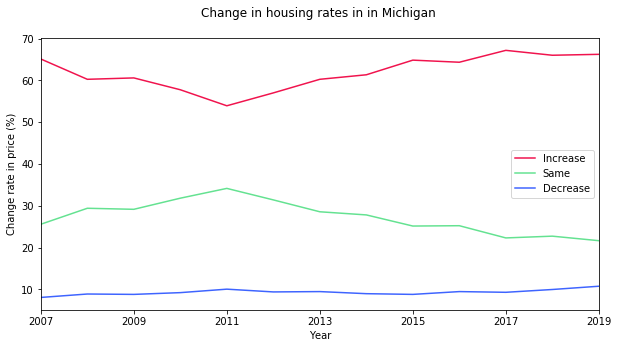

In [144]:
#Using line graphs to visualize the change in housing rates in the past 6 years in Michigan
#Using the matplotlib library and plotting change rate vs year
#Plotting a 10*5 figure and displaying the increase, same and decrease with red, green and blue colors
housing_yearly.plot(figsize=(10, 5), color=['#f0134d', '#64e291','#3e64ff'])
plt.title("Change in housing rates in in Michigan \n"
)

plt.ylabel("Change rate in price (%)")
plt.xlabel("Year")

plt.show()

> - The above line graph shows how there has been a significant ***increase*** in the housing rates in Michigan in the past few years. 
We can further visualize this data using different graphs and plots.


**_<font color= blue>Area plot to represent the changes in housing rates: </font>_**

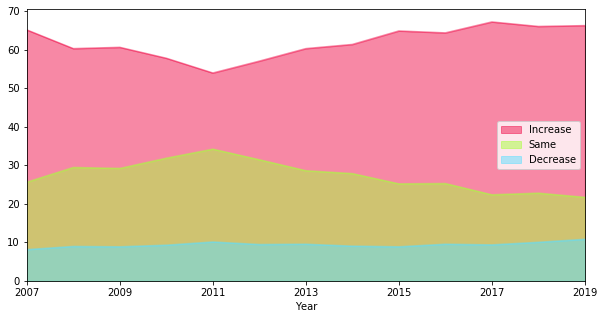

In [145]:
#Using the plot.area method to display the area plot

housing_yearly.plot.area(figsize=(10,5), stacked=False, color=['#f0134d', '#A8FF3E','#5edfff',] , label = ['Change rate', 'year'])



> - This plot gives us the shaded areas of the fluctuation in the housing rates to get a better understanding of the change in these values.
> - Noticing that there is a vast area for the ***increase*** which adds to our analysis that there has been a great increase in the housing rates in Michigan.

**_<font color= blue>Dual axis line graphs to represent the changes in housing rates: </font>_**

<Figure size 432x288 with 0 Axes>

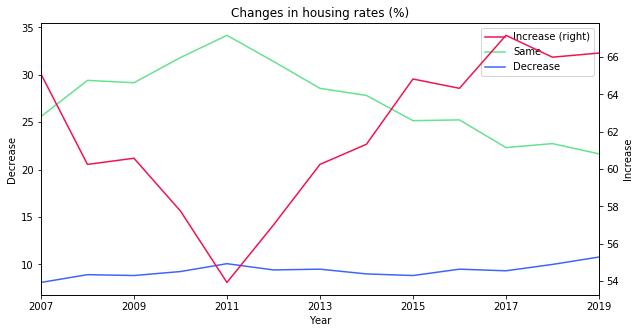

In [146]:
#Plotting a dual axis line graph to portray the significant increase in the housing rates in Michigan.
plt.figure()
#Plotting the graph with all the metrics and secondary y axis as 'Increase'
ax = housing_yearly.plot(secondary_y=['Increase'], figsize= (10,5), color = ['#f0134d', '#64e291','#3e64ff'])
#Labelling the axis
ax.set_ylabel("Decrease")
ax.right_ax.set_ylabel('Increase')
#Naming the graph
plt.title("Changes in housing rates (%)")
plt.xlabel("Year")
plt.show()

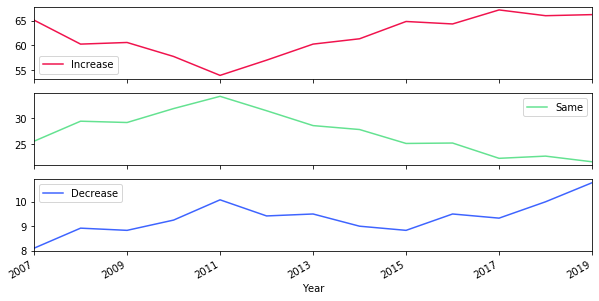

In [147]:
#Subplotting the above graph to make our visualization clean
housing_yearly.plot(subplots=True, figsize=(10, 5), color = ['#f0134d', '#64e291','#3e64ff']);

**_<font color= blue>Line graph to represent selling conditions of houses in Michigan: </font>_**

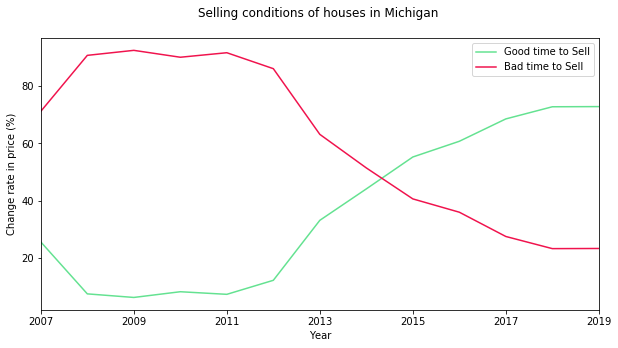

In [148]:
#Using line graphs to visualize the change in selling conditions of houses in the past 6 years in Michigan
#Using the matplotlib library and plotting change rate vs year
#Green shows the good time to sell whereas red represents the bad time to sell.
selling_yearly[15:28].plot(figsize=(10, 5), color=['#64e291','#f0134d'])
plt.title("Selling conditions of houses in Michigan \n"
)

plt.ylabel("Change rate in price (%)")
plt.xlabel("Year")

plt.show()

> - The above line graph displays how the trend has been in the selling conditions of houses in Michigan. 
> - We can notice that in the past few years, there has been a huge ***increase*** in selling houses i.e it is becoming better to sell houses and there is a massive decrease in the bad time to sell.


**_<font color= blue>Histogram to represent housing rates changes in Michigan: </font>_**

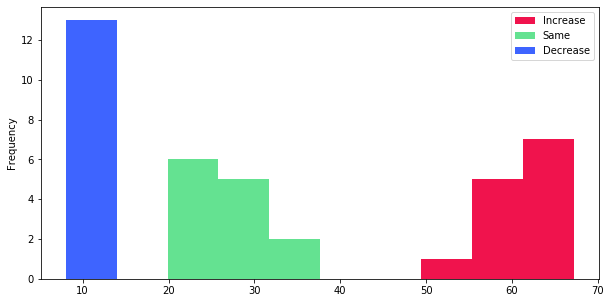

In [149]:
#Using histograms to observe the frequency distributions of the metrics in the housing dataset

housing_yearly.plot.hist([housing_yearly['Increase'],housing_yearly['Same'], housing_yearly['Decrease'] ], stacked=True,
        color = ['#f0134d', '#64e291','#3e64ff'], figsize = (10,5))

> - The above histogram shows us how frequent the metrics increase, same, decrease appeared to be in the dataset.
> - We know that a histogram shows the dataset in terms of bins and the frequency is calcuated through the area of the bars rather than the height of the bars. Area is calculated by multiplying the height with the width of the bars.
> - We get the following approximate areas:
> - Area[decrease] = 13*7 = 91
> - Area[Same] = 6*17 = 102
> - Area[Increase] = 7*17 = 119
> - Therefore, we can conclude that area of the increase bar in highest i.e the frequency of occurence of ***increase*** was the highest in the dataset.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30154208>,
      dtype=object)

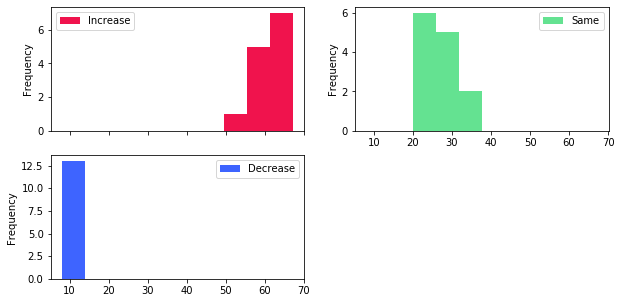

In [150]:
#Subplotting the histograms to make the difference clear
housing_yearly.plot.hist(subplots=True, layout=(2,2), figsize=(10, 5), color = ['#f0134d', '#64e291','#3e64ff'])

**_<font color= blue>Scatter matrices to represent housing rates changes in Michigan: </font>_**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f1526d8>,
      dtype=object)

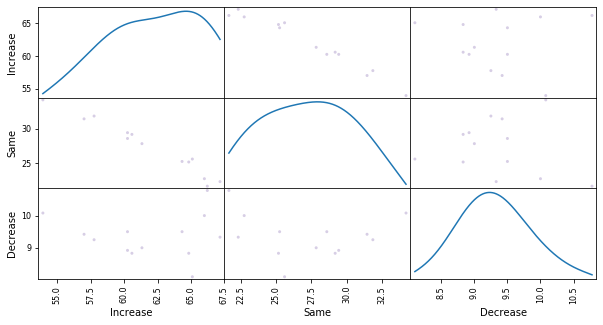

In [151]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_yearly, alpha=0.2, figsize=(10, 5), diagonal='kde', color = ['#380e7f'])

> - The above scatter matrix graph also proves the scrictly increasing nature of the housing rates and how the trend becomes decreasing as we get closer to the decreasing rates

# Task 3.4 : Summarising Insights

**_<font color= blue> Final Visualization and summarising insights: </font>_**

> - Uisng the evidences from the above visualisation, we can notice that there has been an ***increase*** in housing rates and selling conditions, therefore in this final visualisation, I would be focussing on the increase only and justify my final insights.

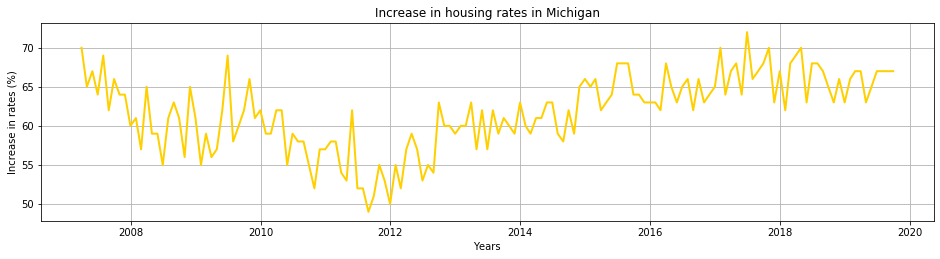

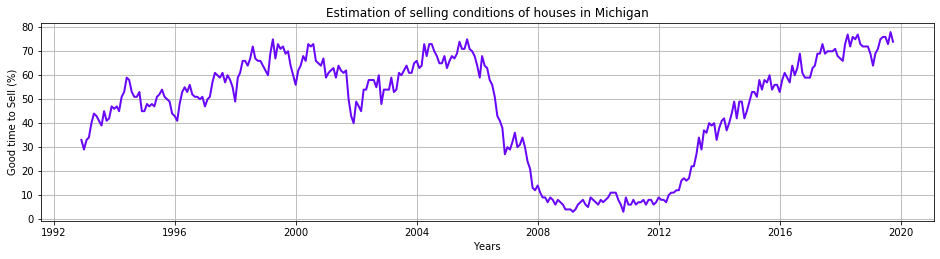

In [152]:
#Plotting a line graph specifically to show the fluctuation in increase in the housing rates in Michigan
#Plotting a 16*8 graph to portray better visibility
fig, ax1 = plt.subplots(figsize=(16,8))
#Creating the subgrid
ax1 = plt.subplot(2,1,1)
#Enabling grid in the plot
ax1.grid(True) 
#Labelling the axis
plt.xlabel('Years')
plt.ylabel('Increase in rates (%)') 
plt.title('Increase in housing rates in Michigan')
#plotting the dates vs the increase rates in yellow color
ax1.plot(housing_simplified_data.Date.values, housing_simplified_data.Increase.values,'#ffd000',linewidth=2) 
plt.show()

#Plotting a line graph specifically to show the fluctuation in selling conditions of the houses in Michigan
#Plotting a 16*8 graph to portray better visibility
fig, ax2 = plt.subplots(figsize=(16,8))
#Creating the subgrid
ax2 = plt.subplot(2,1,1)
#Enabling grid in the plot
ax2.grid(True) 
#Labelling the axis
plt.xlabel('Years')
plt.ylabel('Good time to Sell (%)') 
plt.title('Estimation of selling conditions of houses in Michigan')
#plotting the dates vs good time to sell in violet color
ax2.plot(selling_simplified_data.Date.values, selling_simplified_data['Good time to Sell'],'#6807f9',linewidth=2) 
plt.show()


**_<font color= blue> Increase in Housing rates: </font>_**
> - We know that there has been a steady increase in the housing rates in Michigan. But from this graph, we can infer that around the time just after 2012, there was a strict rise in the housing prices in Michigan which is being continued to the present situation.

**_<font color= blue> Estimation of selling conditions: </font>_**
> - Now, looking at the selling, we can notice the similar trend of increase in the graph just after 2012 and huge rise in the following years until the present situation.
> - ***This leads us to the conclusion that depending on the market valuation, sellers started seeing the oppurtuinities to be able to sell their property and there was a peak in the real estate business.***


# Final Insights and further Analysis

> - The conclusion I draw from the above analysis is that selling conditions of houses and real estate is directly dependent on the market valuation & market situation of housing rates in the particular area. 
> - The higher the market valuation, the better are the chances for more and more people to get interested in selling their property to make more money.
> - Due to recession & housing crisis, there could be a huge dip in the market valuation which results in a bad time to sell the houses, therefore house owners and property dealers must be on the lookout of the market change rates of the properties.
> - The date can be further analysed by making use of the other datasets in the api which contain more information like cost of houses in Michigan in USD i.e the current market value of the houses, buying conditions of the houses and other consumer sentiments which help us gain more insights about the consumers as well as the sellers.
> - The details about the various datasets about the consumer sentiments can be found here:
https://www.quandl.com/data/UMICH-Consumer-Sentiment